In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import mysql.connector as db_conn
import calendar

### Establish the connection to the db and return the conn and cursor

In [2]:
def establish_db_conn() -> tuple:
    """
        Parameters explained: 
            None 

        Return values:
            Tuple which contains the connection object (conn) and the cursor object (conn.cursor()).

        Explanation of function: 
            This function is making the initial one-time connection to the database 'creditcard_capstone' and returning a 
            connection object and a cursor object that will be used to execute sql queries. 
    """
    # make connection
    conn = db_conn.connect(
        host='localhost',
        database='creditcard_capstone',
        user='root',
        password='password'
    )
    # make and return the cursor object
    return conn, conn.cursor()
conn, cursor = establish_db_conn()

## 1. Calculate and plot which transaction type has the highest transaction count.

C:\Users\juan.hun\AppData\Local\Temp\ipykernel_17832\3458898428.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df, x="Category", y="Amount of Orders", palette="crest")


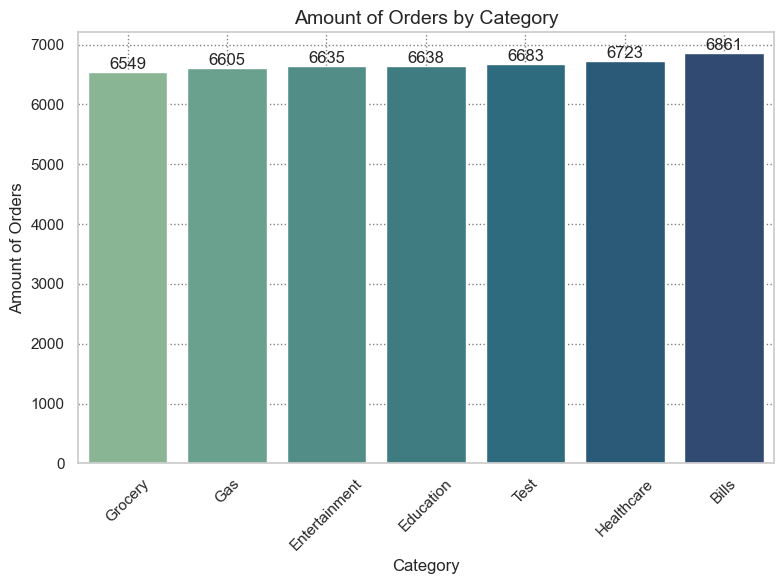

In [3]:
def plot_transaction_count_data(cursor: object) -> None:
    cursor.execute(
        """
            select transaction_type, count(transaction_id) as orders, sum(transaction_value)
            from cdw_sapp_credit_card
            group by transaction_type
            order by orders; 
        """
    )

    df = pd.DataFrame(cursor.fetchall(), columns=["Category", "Amount of Orders", "Total of Orders"])

    sns.set_theme(style='whitegrid')
    plt.figure(figsize=(8, 6))
    ax = sns.barplot(data=df, x="Category", y="Amount of Orders", palette="crest")

    # Add data labels
    for container in ax.containers:
        ax.bar_label(container, fmt='%d')

    plt.title("Amount of Orders by Category", fontsize=14)
    plt.xticks(rotation=45)
    plt.grid(True, linestyle=':', linewidth=1, color='gray') 
    plt.tight_layout()
    plt.show()
plot_transaction_count_data(cursor)

## 2. Calculate and plot the top 10 states with the highest number of customers.

C:\Users\juan.hun\AppData\Local\Temp\ipykernel_17832\3008098132.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="State", y="Number of Customers", palette="viridis")


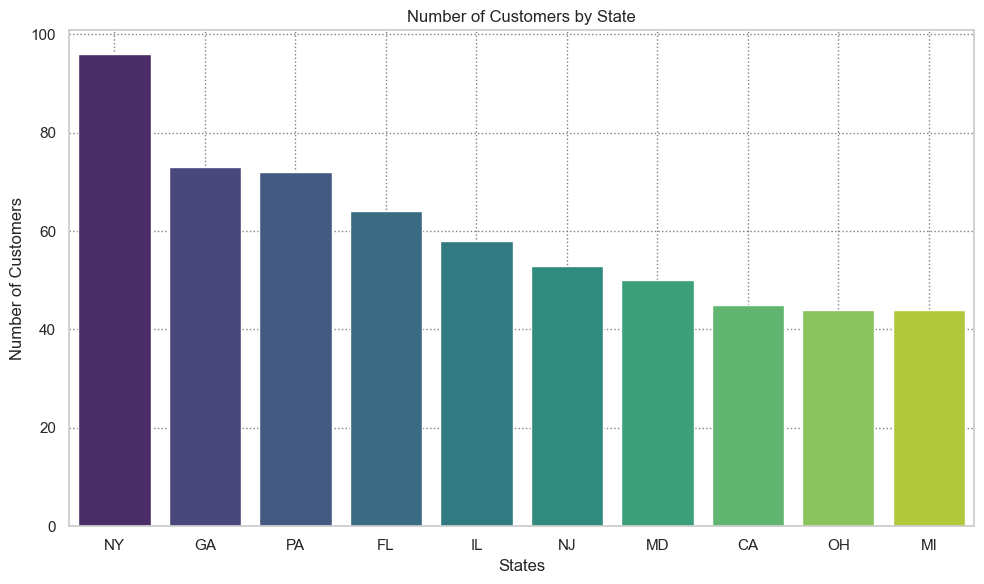

In [4]:
def plot_customer_density(cursor: object) -> None:
    cursor.execute(
        """
            select cust_state, count(ssn)
            from cdw_sapp_customer
            group by cust_state
            order by count(ssn) desc
            limit 10;
        """
    )

    df = pd.DataFrame(cursor.fetchall(), columns=["State", "Number of Customers"])
    # Bar plot of customers per state
    plt.figure(figsize=(10, 6))
    sns.barplot(data=df, x="State", y="Number of Customers", palette="viridis")
    plt.xlabel(xlabel="States")
    plt.title("Number of Customers by State")
    plt.grid(True, linestyle=':', linewidth=1, color='gray') 
    plt.tight_layout()
    plt.show()
plot_customer_density(cursor)

## 3. Calculate the total transaction sum for each customer based on their individual transactions. Identify the top 10 customers with the highest transaction amounts (in dollar value). Create a plot to showcase these top customers and their transaction sums.

C:\Users\juan.hun\AppData\Local\Temp\ipykernel_17832\1733123114.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, y="Customer", x="Total", palette="Blues_d")


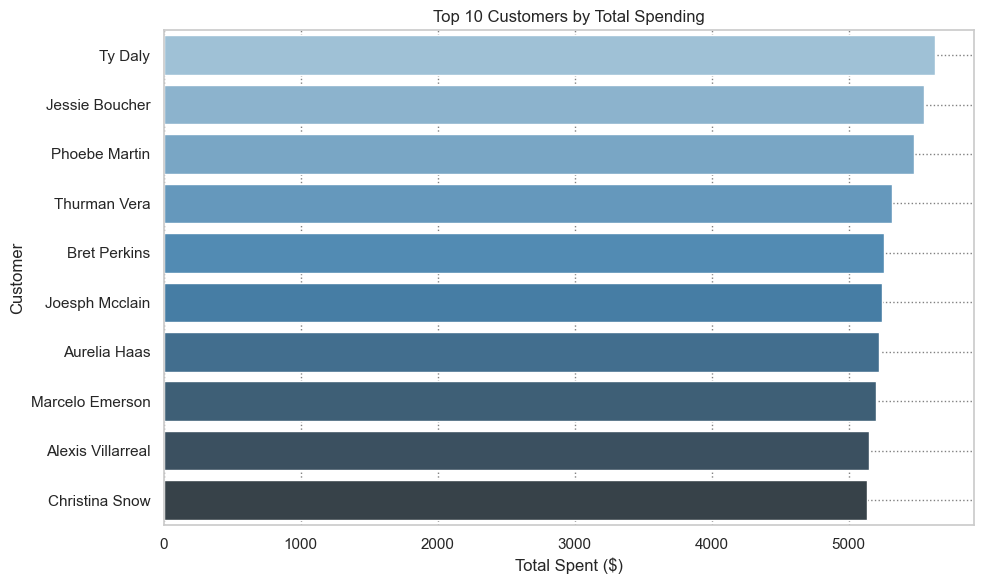

In [5]:
def display_top_10_customers(cursor: object) -> None:
    cursor.execute(
        """
            select cu.first_name, cu.last_name, sum(cc.transaction_value) as total
            from cdw_sapp_credit_card cc
            left join cdw_sapp_customer cu on cc.cust_ssn = cu.ssn
            group by cust_ssn
            order by total desc
            limit 10;
        """
    )
    
    df = pd.DataFrame(cursor.fetchall(), columns=["First Name", "Last Name", "Total"])
    # Optional: Combine full name
    df["Customer"] = df["First Name"] + " " + df["Last Name"]

    # Plot
    plt.figure(figsize=(10, 6))
    sns.barplot(data=df, y="Customer", x="Total", palette="Blues_d")
    plt.title("Top 10 Customers by Total Spending")
    plt.xlabel("Total Spent ($)")
    plt.ylabel("Customer")
    plt.grid(True, linestyle=':', linewidth=1, color='gray') 
    plt.tight_layout()
    plt.show()
display_top_10_customers(cursor)


## 4. Calculate and plot the percentage of applications approved for self-employed applicants. Use the appropriate chart or graph to represent this data.

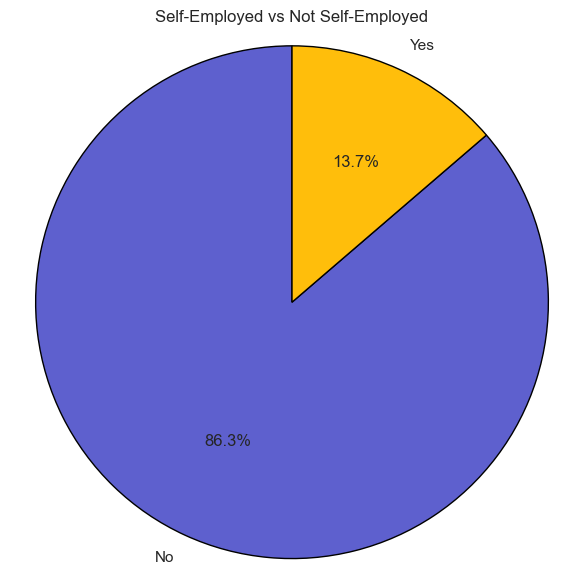

In [6]:
def display_self_employed_apps(cursor: object) -> None:
    cursor.execute(
        """
            select self_employed
            from cdw_sapp_loan_application
            order by self_employed;
        """
    )

    df = pd.DataFrame(cursor.fetchall(), columns=["Self Employed"])
    counts = df["Self Employed"].value_counts()

    # Create pie chart
    plt.figure(figsize=(6, 6))
    plt.pie(
        counts,
        labels=counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=["#5e60ce", "#ffbe0b"],  # Optional: green for yes, red for no
        wedgeprops={'edgecolor': 'black'}
    )

    plt.title("Self-Employed vs Not Self-Employed")
    plt.axis('equal')  # Keep it circular
    plt.tight_layout()
    plt.show()
display_self_employed_apps(cursor)

## 5. Calculate the percentage of rejection for married male applicants. Use the ideal chart or graph to represent this data.

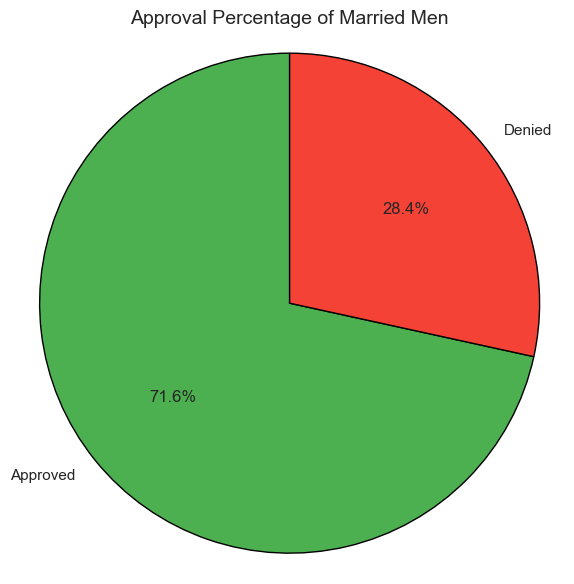

In [7]:
def plot_rejected_male_apps(cursor: object) -> None:
    cursor.execute(
        """
            select application_status
            from cdw_sapp_loan_application
            where gender = 'male' and married = 'Yes';
        """
    )

    df = pd.DataFrame(cursor.fetchall(), columns=["Status"])
    # map 'Y' and 'N' to readable labels
    df['Claim Status'] = df['Status'].replace({'Y': 'Approved', 'N': 'Denied'})

    # count values
    status_counts = df['Claim Status'].value_counts()

    # plot pie chart
    colors = ["#4CAF50", "#F44336"]  # Green for approved, red for denied

    plt.figure(figsize=(6, 6))
    plt.pie(
        status_counts,
        labels=status_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors,
        wedgeprops={'edgecolor': 'black'}
    )

    plt.title("Approval Percentage of Married Men", fontsize=14)
    plt.axis('equal') 
    plt.tight_layout()
    plt.show()
plot_rejected_male_apps(cursor)

## 6. Calculate and plot the top three months with the largest volume of transaction data. Use the ideal chart or graph to represent this data.

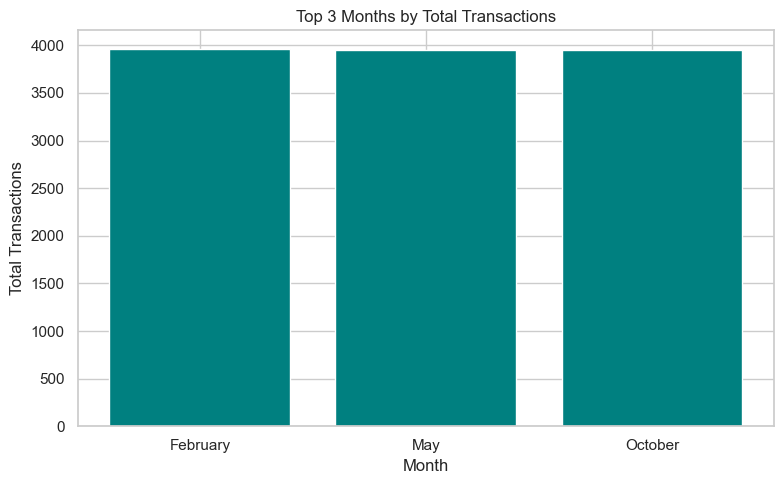

In [30]:
def plot_top_three_months(cursor: object) -> None:
    # count(transaction_id) was used over sum(transaction_value) because the question was asking for volume not sum or revenue etc. 
    cursor.execute(
        """
            select month(timeid), count(transaction_id) as total
            from cdw_sapp_credit_card
            group by month(timeid)
            order by total desc
            limit 3;
        """
    )

    df = pd.DataFrame(cursor.fetchall(), columns=["Month", "Total Transactions"])

    # Convert numeric month to full month name
    df["Month"] = df["Month"].apply(lambda x: calendar.month_name[int(x)])

    # Plot a bar chart
    plt.figure(figsize=(8, 5))
    plt.bar(df["Month"], df["Total Transactions"], color="teal")

    # Add labels and title
    plt.title("Top 3 Months by Total Transactions")
    plt.xlabel("Month")
    plt.ylabel("Total Transactions")
    plt.yticks(range(0, 4500, 500))
    plt.tight_layout()
    plt.show()

plot_top_three_months(cursor)

## 7. Calculate and plot which branch processed the highest total dollar value of healthcare transactions. Use the ideal chart or graph to represent this data.

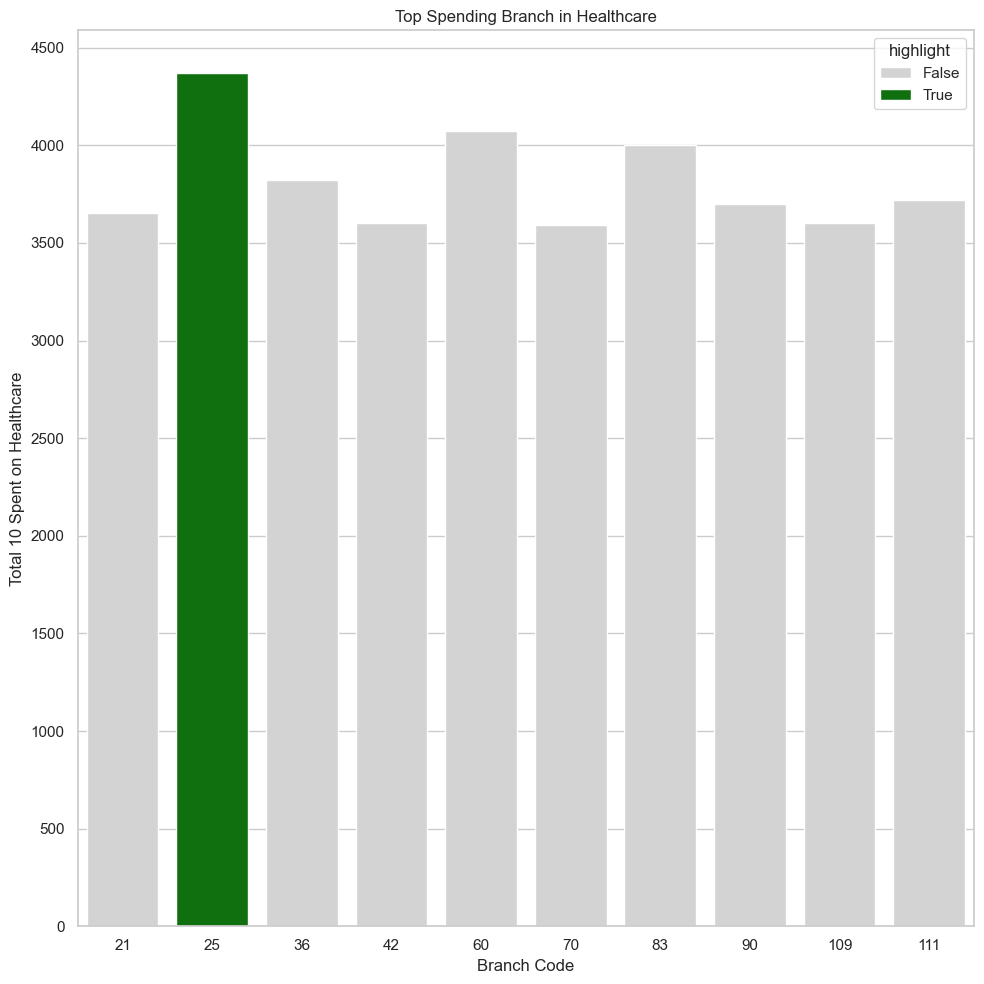

In [31]:
def plot_healthcare_transactions(cursor: object) -> None:
    cursor.execute(
        """
            select cb.branch_code, sum(cc.transaction_value)
            from cdw_sapp_credit_card cc 
            left join cdw_sapp_branch cb on cc.branch_code = cb.branch_code
            where cc.transaction_type = 'Healthcare'
            group by cb.branch_code
            order by sum(cc.transaction_value) desc
            limit 10;
        """
    )

    df = pd.DataFrame(cursor.fetchall(), columns=["Branch Code", "Total Spent on Healthcare"])

    df_sorted = df.sort_values("Total Spent on Healthcare", ascending=False)

    top_spender = df_sorted.iloc[0]

    # Create a column that highlights the top spender
    df_sorted['highlight'] = df_sorted['Branch Code'] == top_spender['Branch Code']

    # Plot the horizontal bar chart
    plt.figure(figsize=(10, 10))
    sns.barplot(
        data=df_sorted,
        x="Branch Code",
        y="Total Spent on Healthcare",
        hue="highlight",  # Use hue to highlight the top spender
        palette={True: "green", False: "lightgray"},  # Highlight the top spender in green
        dodge=False
    )

    # Title and labels
    plt.title("Top Spending Branch in Healthcare")
    plt.xlabel("Branch Code")
    plt.ylabel("Total 10 Spent on Healthcare")
    plt.yticks(range(0, 5000, 500))
    plt.tight_layout()
    plt.show()


plot_healthcare_transactions(cursor)